<a href="https://colab.research.google.com/github/collegeyulin/capstone_YOLOv8/blob/main/Dataset_Checker.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install ultralytics


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 13.5 MB/s eta 0:00:00


In [ ]:
!pip install torch torchvision matplotlib


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 65.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 35.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 49.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 93.4 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import os
import yaml
from collections import defaultdict

# Set your dataset path
dataset_dir = "/content/drive/MyDrive/Capstone_Dataset_BismillahFinal.v6i.yolov8"
yaml_path = os.path.join(dataset_dir, "data.yaml")

# Load class names
with open(yaml_path, 'r') as f:
    class_names = yaml.safe_load(f)['names']
num_classes = len(class_names)

# Count images per class (across all splits)
image_counts_per_class = defaultdict(set)

for split in ['train', 'valid', 'test']:
    labels_dir = os.path.join(dataset_dir, split, 'labels')
    images_dir = os.path.join(dataset_dir, split, 'images')

    for label_file in os.listdir(labels_dir):
        if not label_file.endswith(".txt"):
            continue

        label_path = os.path.join(labels_dir, label_file)
        image_name = os.path.splitext(label_file)[0] + ".jpg"
        image_path = os.path.join(images_dir, image_name)

        if not os.path.exists(image_path):
            continue

        with open(label_path, 'r') as f:
            for line in f:
                class_id = int(line.split()[0])
                image_counts_per_class[class_id].add(image_path)

# Display results
print("🧾 Image Count per Class (based on labels):\n")
for class_id, image_set in image_counts_per_class.items():
    print(f"{class_names[class_id]:<20}: {len(image_set)} images")

total_images = len(set(img for imgs in image_counts_per_class.values() for img in imgs))
print(f"\n📸 Total unique labeled images: {total_images}")

🧾 Image Count per Class (based on labels):

Botol-PET           : 515 images
Kardus              : 544 images
Aluminum            : 530 images
Plastik-kemasan     : 555 images
Organik             : 528 images
Galon               : 612 images
Botol-kaca          : 612 images
Tutup-botol         : 638 images
Botol-plastik       : 521 images

📸 Total unique labeled images: 5055


In [ ]:
import os
import shutil
import yaml
import random
from collections import defaultdict

# Paths
dataset_dir = "/content/drive/MyDrive/Capstone_Dataset_BismillahFinal.v6i.yolov8"
yaml_path = os.path.join(dataset_dir, "data.yaml")
output_base = "/content/drive/MyDrive/Dataset500NEW"

# Load class names
with open(yaml_path, 'r') as f:
    class_names = yaml.safe_load(f)['names']
num_classes = len(class_names)

# Collect images per class
images_per_class = defaultdict(set)

for split in ['train', 'valid', 'test']:
    labels_dir = os.path.join(dataset_dir, split, 'labels')
    images_dir = os.path.join(dataset_dir, split, 'images')

    for label_file in os.listdir(labels_dir):
        if not label_file.endswith(".txt"):
            continue

        label_path = os.path.join(labels_dir, label_file)
        image_name = os.path.splitext(label_file)[0] + ".jpg"
        image_path = os.path.join(images_dir, image_name)

        if not os.path.exists(image_path):
            continue

        with open(label_path, 'r') as f:
            class_ids = {int(line.split()[0]) for line in f if line.strip()}

        for class_id in class_ids:
            images_per_class[class_id].add((image_path, label_path))

# Prepare output directories
for split in ['train', 'valid', 'test']:
    os.makedirs(os.path.join(output_base, split, 'images'), exist_ok=True)
    os.makedirs(os.path.join(output_base, split, 'labels'), exist_ok=True)

# Limit to 500 per class and split 80:10:10
for class_id, items in images_per_class.items():
    items = list(items)
    random.shuffle(items)
    limited = items[:500]

    n_train = int(0.8 * len(limited))
    n_val = int(0.1 * len(limited))
    n_test = len(limited) - n_train - n_val

    splits = {
        'train': limited[:n_train],
        'valid': limited[n_train:n_train + n_val],
        'test':  limited[n_train + n_val:]
    }

    for split, files in splits.items():
        for img_path, lbl_path in files:
            img_name = os.path.basename(img_path)
            lbl_name = os.path.basename(lbl_path)

            shutil.copy(img_path, os.path.join(output_base, split, 'images', img_name))
            shutil.copy(lbl_path, os.path.join(output_base, split, 'labels', lbl_name))

print("✅ Dataset limited and split successfully.")


✅ Dataset limited and split successfully.


In [ ]:
import os
import yaml
from collections import defaultdict

# Set your dataset path
dataset_dir = "/content/drive/MyDrive/Dataset500NEW"
yaml_path = os.path.join(dataset_dir, "data.yaml")

# Load class names
with open(yaml_path, 'r') as f:
    class_names = yaml.safe_load(f)['names']
num_classes = len(class_names)

# Count images per class (across all splits)
image_counts_per_class = defaultdict(set)

for split in ['train', 'valid', 'test']:
    labels_dir = os.path.join(dataset_dir, split, 'labels')
    images_dir = os.path.join(dataset_dir, split, 'images')

    for label_file in os.listdir(labels_dir):
        if not label_file.endswith(".txt"):
            continue

        label_path = os.path.join(labels_dir, label_file)
        image_name = os.path.splitext(label_file)[0] + ".jpg"
        image_path = os.path.join(images_dir, image_name)

        if not os.path.exists(image_path):
            continue

        with open(label_path, 'r') as f:
            for line in f:
                class_id = int(line.split()[0])
                image_counts_per_class[class_id].add(image_path)

# Display results
print("🧾 Image Count per Class (based on labels):\n")
for class_id, image_set in image_counts_per_class.items():
    print(f"{class_names[class_id]:<20}: {len(image_set)} images")

total_images = len(set(img for imgs in image_counts_per_class.values() for img in imgs))
print(f"\n📸 Total unique labeled images: {total_images}")

🧾 Image Count per Class (based on labels):

Botol Plastik Berwarna: 500 images
Kardus              : 500 images
Aluminum            : 500 images
Plastik Kemasan     : 500 images
Sisa Makanan        : 500 images
Galon               : 500 images
Botol Kaca          : 500 images
Tutup Botol         : 500 images
Botol Plastik Transparan: 500 images

📸 Total unique labeled images: 4500


In [ ]:
import os
import yaml
from collections import defaultdict

# Set your dataset path
dataset_dir = "/content/drive/MyDrive/Dataset500NEW"
yaml_path = os.path.join(dataset_dir, "data.yaml")

# Load class names
with open(yaml_path, 'r') as f:
    class_names = yaml.safe_load(f)['names']
num_classes = len(class_names)

# Count instances per class per split
instance_counts = {
    'train': defaultdict(int),
    'valid': defaultdict(int),
    'test': defaultdict(int)
}

# Loop through each split
for split in ['train', 'valid', 'test']:
    labels_dir = os.path.join(dataset_dir, split, 'labels')

    for label_file in os.listdir(labels_dir):
        if not label_file.endswith(".txt"):
            continue

        label_path = os.path.join(labels_dir, label_file)

        with open(label_path, 'r') as f:
            for line in f:
                if line.strip():
                    class_id = int(line.split()[0])
                    instance_counts[split][class_id] += 1

# Print results
for split in ['train', 'valid', 'test']:
    print(f"\n📂 {split.upper()} SPLIT - Instances per Class:\n")
    for class_id in range(num_classes):
        count = instance_counts[split][class_id]
        print(f"{class_names[class_id]:<25}: {count} instances")



📂 TRAIN SPLIT - Instances per Class:

Aluminum                 : 400 instances
Botol Plastik Berwarna   : 400 instances
Botol Kaca               : 400 instances
Botol Plastik Transparan : 400 instances
Galon                    : 403 instances
Kardus                   : 400 instances
Sisa Makanan             : 400 instances
Plastik Kemasan          : 400 instances
Tutup Botol              : 400 instances

📂 VALID SPLIT - Instances per Class:

Aluminum                 : 50 instances
Botol Plastik Berwarna   : 50 instances
Botol Kaca               : 50 instances
Botol Plastik Transparan : 50 instances
Galon                    : 50 instances
Kardus                   : 50 instances
Sisa Makanan             : 50 instances
Plastik Kemasan          : 50 instances
Tutup Botol              : 50 instances

📂 TEST SPLIT - Instances per Class:

Aluminum                 : 50 instances
Botol Plastik Berwarna   : 50 instances
Botol Kaca               : 50 instances
Botol Plastik Transparan : 50 insta

In [ ]:
import os
from collections import defaultdict

# Set dataset path
dataset_dir = "/content/drive/MyDrive/Dataset500NEW"
splits = ['train', 'valid', 'test']

# Dictionary to store image -> instance count
multi_instance_images = defaultdict(list)

for split in splits:
    labels_dir = os.path.join(dataset_dir, split, 'labels')
    images_dir = os.path.join(dataset_dir, split, 'images')

    for label_file in os.listdir(labels_dir):
        if not label_file.endswith(".txt"):
            continue

        label_path = os.path.join(labels_dir, label_file)
        image_name = os.path.splitext(label_file)[0] + ".jpg"
        image_path = os.path.join(images_dir, image_name)

        # Count number of lines (instances) in label file
        with open(label_path, 'r') as f:
            lines = [line.strip() for line in f if line.strip()]
            if len(lines) > 1:
                multi_instance_images[split].append((image_name, len(lines)))

# Display results
for split in splits:
    print(f"\n📂 {split.upper()} - Images with >1 instances:")
    for image_name, count in multi_instance_images[split]:
        print(f"{image_name:<30} --> {count} instances")

# Optional: total summary
total = sum(len(v) for v in multi_instance_images.values())
print(f"\n🧮 Total images with >1 instance: {total}")



📂 TRAIN - Images with >1 instances:
20250601_214417_jpg.rf.245f84955af864d490754654345823ed.jpg --> 2 instances
20250601_214417_jpg.rf.cf0e557b3efa3617e4a11e07d4338609.jpg --> 2 instances
20250601_214417_jpg.rf.dd348e9d215ed052c146012cfc6d3b23.jpg --> 2 instances

📂 VALID - Images with >1 instances:

📂 TEST - Images with >1 instances:

🧮 Total images with >1 instance: 3


📷 train/images/20250601_214417_jpg.rf.245f84955af864d490754654345823ed.jpg


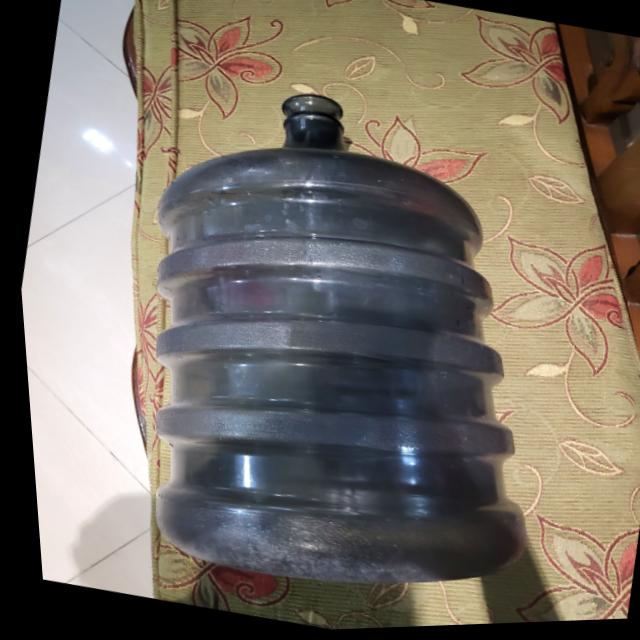

📷 train/images/20250601_214417_jpg.rf.cf0e557b3efa3617e4a11e07d4338609.jpg


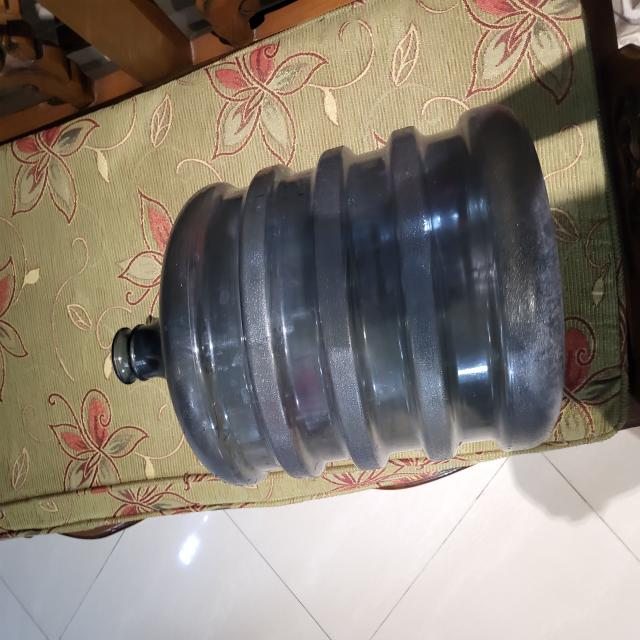

📷 train/images/20250601_214417_jpg.rf.dd348e9d215ed052c146012cfc6d3b23.jpg


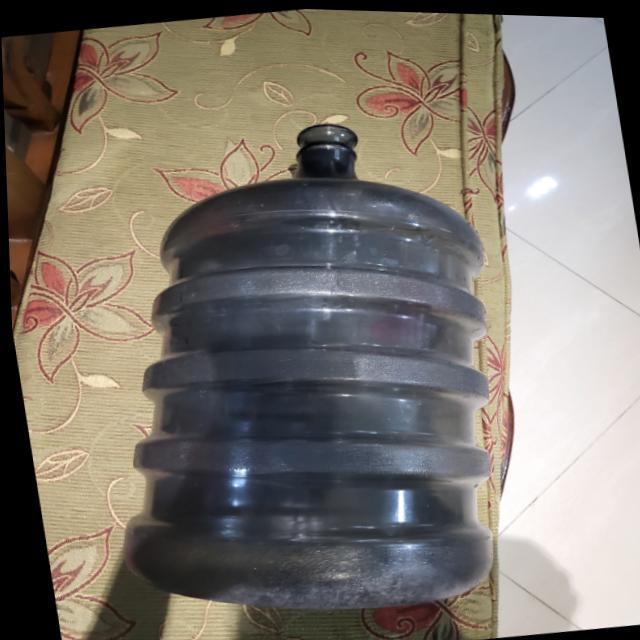

In [ ]:
import os
from IPython.display import Image, display

# Dataset root directory
dataset_dir = "/content/drive/MyDrive/Dataset500NEW"

# Image filenames to show
image_filenames = [
    "20250601_214417_jpg.rf.245f84955af864d490754654345823ed.jpg",
    "20250601_214417_jpg.rf.cf0e557b3efa3617e4a11e07d4338609.jpg",
    "20250601_214417_jpg.rf.dd348e9d215ed052c146012cfc6d3b23.jpg"
]

# Search and display images
found = False
for split in ['train', 'valid', 'test']:
    image_dir = os.path.join(dataset_dir, split, "images")
    for filename in image_filenames:
        image_path = os.path.join(image_dir, filename)
        if os.path.exists(image_path):
            print(f"📷 {split}/images/{filename}")
            display(Image(filename=image_path))
            found = True

if not found:
    print("❌ None of the specified images were found.")


🖼️ Showing train/images/20250601_214417_jpg.rf.245f84955af864d490754654345823ed.jpg


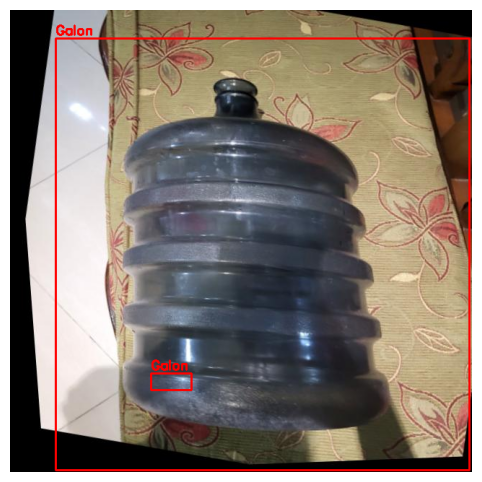

🖼️ Showing train/images/20250601_214417_jpg.rf.cf0e557b3efa3617e4a11e07d4338609.jpg


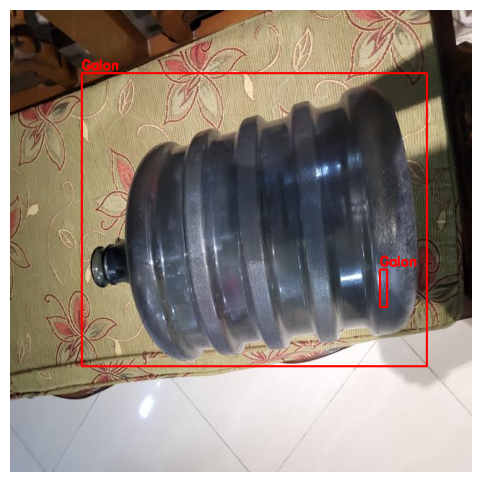

🖼️ Showing train/images/20250601_214417_jpg.rf.dd348e9d215ed052c146012cfc6d3b23.jpg


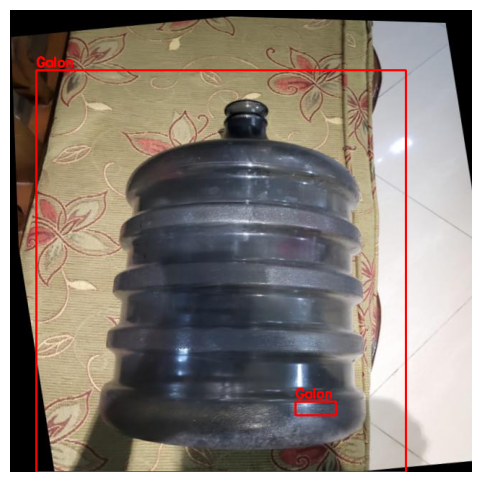

In [ ]:
import os
import cv2
import yaml
import matplotlib.pyplot as plt

# === SETTINGS ===
dataset_dir = "/content/drive/MyDrive/Dataset500NEW"
splits = ['train', 'valid', 'test']
image_filenames = [
    "20250601_214417_jpg.rf.245f84955af864d490754654345823ed.jpg",
    "20250601_214417_jpg.rf.cf0e557b3efa3617e4a11e07d4338609.jpg",
    "20250601_214417_jpg.rf.dd348e9d215ed052c146012cfc6d3b23.jpg"
]

# === Load class names from YAML ===
yaml_path = os.path.join(dataset_dir, "data.yaml")
with open(yaml_path, 'r') as f:
    class_names = yaml.safe_load(f)['names']

# === Function to draw bounding boxes from YOLO format ===
def draw_boxes(image_path, label_path):
    image = cv2.imread(image_path)
    if image is None:
        print(f"❌ Failed to load image: {image_path}")
        return

    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    h, w, _ = image.shape

    if not os.path.exists(label_path):
        print(f"⚠️ No label file found for {image_path}")
        return image

    with open(label_path, 'r') as f:
        for line in f:
            class_id, x_center, y_center, box_w, box_h = map(float, line.strip().split())
            class_id = int(class_id)

            # Convert relative coordinates to absolute
            x1 = int((x_center - box_w / 2) * w)
            y1 = int((y_center - box_h / 2) * h)
            x2 = int((x_center + box_w / 2) * w)
            y2 = int((y_center + box_h / 2) * h)

            # Draw rectangle
            color = (255, 0, 0)  # Red box
            cv2.rectangle(image, (x1, y1), (x2, y2), color, 2)

            # Label
            label = class_names[class_id]
            cv2.putText(image, label, (x1, y1 - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.6, color, 2)

    return image

# === Search for images and display with bounding boxes ===
for split in splits:
    for filename in image_filenames:
        image_path = os.path.join(dataset_dir, split, "images", filename)
        label_path = os.path.join(dataset_dir, split, "labels", filename.replace(".jpg", ".txt"))

        if os.path.exists(image_path):
            print(f"🖼️ Showing {split}/images/{filename}")
            img_with_boxes = draw_boxes(image_path, label_path)
            plt.figure(figsize=(8, 6))
            plt.imshow(img_with_boxes)
            plt.axis('off')
            plt.show()


In [ ]:
import os

# Directory where your label files are located
label_dir = "/content/drive/MyDrive/Dataset500NEW/train/labels"

# List of image filenames (with .jpg)
image_filenames = [
    "20250601_214417_jpg.rf.245f84955af864d490754654345823ed.jpg",
    "20250601_214417_jpg.rf.cf0e557b3efa3617e4a11e07d4338609.jpg",
    "20250601_214417_jpg.rf.dd348e9d215ed052c146012cfc6d3b23.jpg"
]

# Loop over each image and process its label file
for image_file in image_filenames:
    label_file = image_file.replace(".jpg", ".txt")
    label_path = os.path.join(label_dir, label_file)

    if not os.path.exists(label_path):
        print(f"❌ Label file not found: {label_path}")
        continue

    with open(label_path, 'r') as f:
        lines = f.readlines()

    boxes = []
    for line in lines:
        parts = line.strip().split()
        if len(parts) == 5:
            cls, x, y, w, h = map(float, parts)
            area = w * h
            boxes.append((area, line.strip()))

    if len(boxes) > 1:
        boxes.sort(key=lambda x: x[0])  # Sort by area
        boxes = boxes[1:]  # Remove smallest box

        with open(label_path, 'w') as f:
            for _, line in boxes:
                f.write(line + '\n')

        print(f"✅ Removed smallest box from: {label_file}")
    else:
        print(f"⚠️ Only one box in: {label_file}, nothing removed.")


✅ Removed smallest box from: 20250601_214417_jpg.rf.245f84955af864d490754654345823ed.txt
✅ Removed smallest box from: 20250601_214417_jpg.rf.cf0e557b3efa3617e4a11e07d4338609.txt
✅ Removed smallest box from: 20250601_214417_jpg.rf.dd348e9d215ed052c146012cfc6d3b23.txt


🖼️ Showing train/images/20250601_214417_jpg.rf.245f84955af864d490754654345823ed.jpg


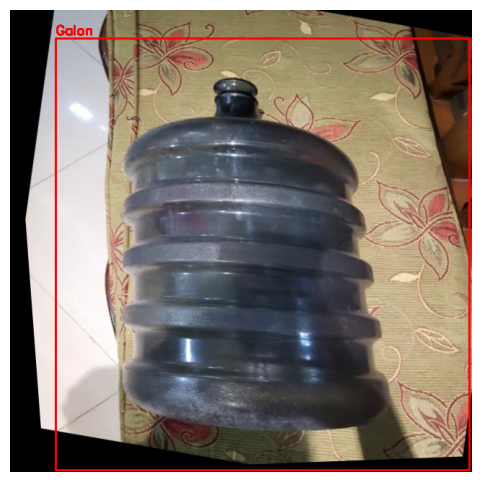

🖼️ Showing train/images/20250601_214417_jpg.rf.cf0e557b3efa3617e4a11e07d4338609.jpg


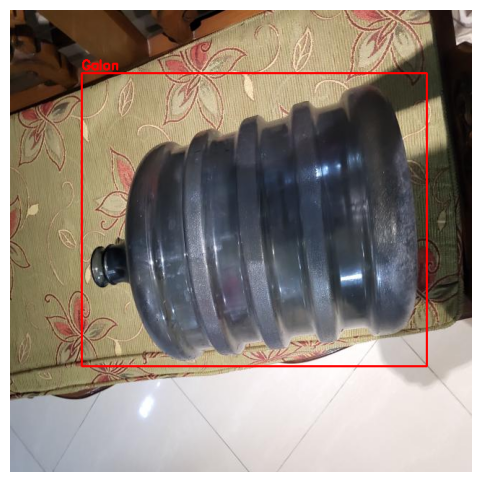

🖼️ Showing train/images/20250601_214417_jpg.rf.dd348e9d215ed052c146012cfc6d3b23.jpg


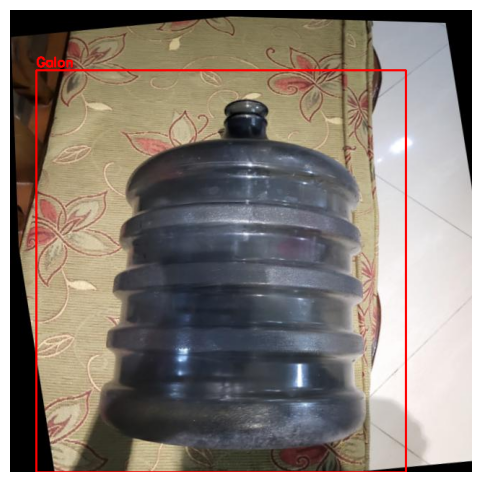

In [ ]:
import os
import cv2
import yaml
import matplotlib.pyplot as plt

# === SETTINGS ===
dataset_dir = "/content/drive/MyDrive/Dataset500NEW"
splits = ['train', 'valid', 'test']
image_filenames = [
    "20250601_214417_jpg.rf.245f84955af864d490754654345823ed.jpg",
    "20250601_214417_jpg.rf.cf0e557b3efa3617e4a11e07d4338609.jpg",
    "20250601_214417_jpg.rf.dd348e9d215ed052c146012cfc6d3b23.jpg"
]

# === Load class names from YAML ===
yaml_path = os.path.join(dataset_dir, "data.yaml")
with open(yaml_path, 'r') as f:
    class_names = yaml.safe_load(f)['names']

# === Function to draw bounding boxes from YOLO format ===
def draw_boxes(image_path, label_path):
    image = cv2.imread(image_path)
    if image is None:
        print(f"❌ Failed to load image: {image_path}")
        return

    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    h, w, _ = image.shape

    if not os.path.exists(label_path):
        print(f"⚠️ No label file found for {image_path}")
        return image

    with open(label_path, 'r') as f:
        for line in f:
            class_id, x_center, y_center, box_w, box_h = map(float, line.strip().split())
            class_id = int(class_id)

            # Convert relative coordinates to absolute
            x1 = int((x_center - box_w / 2) * w)
            y1 = int((y_center - box_h / 2) * h)
            x2 = int((x_center + box_w / 2) * w)
            y2 = int((y_center + box_h / 2) * h)

            # Draw rectangle
            color = (255, 0, 0)  # Red box
            cv2.rectangle(image, (x1, y1), (x2, y2), color, 2)

            # Label
            label = class_names[class_id]
            cv2.putText(image, label, (x1, y1 - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.6, color, 2)

    return image

# === Search for images and display with bounding boxes ===
for split in splits:
    for filename in image_filenames:
        image_path = os.path.join(dataset_dir, split, "images", filename)
        label_path = os.path.join(dataset_dir, split, "labels", filename.replace(".jpg", ".txt"))

        if os.path.exists(image_path):
            print(f"🖼️ Showing {split}/images/{filename}")
            img_with_boxes = draw_boxes(image_path, label_path)
            plt.figure(figsize=(8, 6))
            plt.imshow(img_with_boxes)
            plt.axis('off')
            plt.show()


##FINAL CHECK

In [ ]:
import os
import yaml
from collections import defaultdict

# Set your dataset path
dataset_dir = "/content/drive/MyDrive/Dataset500NEW"
yaml_path = os.path.join(dataset_dir, "data.yaml")

# Load class names
with open(yaml_path, 'r') as f:
    class_names = yaml.safe_load(f)['names']
num_classes = len(class_names)

# Count instances per class per split
instance_counts = {
    'train': defaultdict(int),
    'valid': defaultdict(int),
    'test': defaultdict(int)
}

# Loop through each split
for split in ['train', 'valid', 'test']:
    labels_dir = os.path.join(dataset_dir, split, 'labels')

    for label_file in os.listdir(labels_dir):
        if not label_file.endswith(".txt"):
            continue

        label_path = os.path.join(labels_dir, label_file)

        with open(label_path, 'r') as f:
            for line in f:
                if line.strip():
                    class_id = int(line.split()[0])
                    instance_counts[split][class_id] += 1

# Print results
for split in ['train', 'valid', 'test']:
    print(f"\n📂 {split.upper()} SPLIT - Instances per Class:\n")
    for class_id in range(num_classes):
        count = instance_counts[split][class_id]
        print(f"{class_names[class_id]:<25}: {count} instances")


📂 TRAIN SPLIT - Instances per Class:

Aluminum                 : 400 instances
Botol Plastik Berwarna   : 400 instances
Botol Kaca               : 400 instances
Botol Plastik Transparan : 400 instances
Galon                    : 400 instances
Kardus                   : 400 instances
Sisa Makanan             : 400 instances
Plastik Kemasan          : 400 instances
Tutup Botol              : 400 instances

📂 VALID SPLIT - Instances per Class:

Aluminum                 : 50 instances
Botol Plastik Berwarna   : 50 instances
Botol Kaca               : 50 instances
Botol Plastik Transparan : 50 instances
Galon                    : 50 instances
Kardus                   : 50 instances
Sisa Makanan             : 50 instances
Plastik Kemasan          : 50 instances
Tutup Botol              : 50 instances

📂 TEST SPLIT - Instances per Class:

Aluminum                 : 50 instances
Botol Plastik Berwarna   : 50 instances
Botol Kaca               : 50 instances
Botol Plastik Transparan : 50 insta